


## Cleaning the dataset

In [177]:
import geopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
%matplotlib inline
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="app.py")

In [178]:
# Read the csv file
data = pd.read_csv('data.csv', encoding= 'unicode_escape')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Previewing the dataset

In [179]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [180]:
data.shape


(541909, 8)

In [181]:
data.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [182]:
data.describe()

## Notes
# Negative values in [UnitPrice], [Quantity], 
# CustomerID missing ~ 100.000 entries/nulls
# Someone bought ~ 81.000 of an item

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Processing the dataset

In [183]:
# Converting [InvoiceDate] to datetime type

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Creating Year, Month, Month/Year, Profit columns

data['Year'] = data['InvoiceDate'].dt.year.astype('str')
data['Month'] = data['InvoiceDate'].dt.month.astype('str')
data['MonthYear'] = data['Month'] + '/' + data['Year'] 
data['Profit'] = data.Quantity * data.UnitPrice
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,12/2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12/2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,12/2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12/2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12/2010,20.34


## Rearranging the columns



In [184]:
# Creating columns list
cols = list(data.columns.values)
cols

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country',
 'Year',
 'Month',
 'MonthYear',
 'Profit']

In [185]:
# Making a new dataframe with the correct order of columns
new_cols = ( 'Description', 'Quantity','UnitPrice','Profit','MonthYear','Year','Month',
            'Country', 'StockCode','InvoiceNo','InvoiceDate', 'CustomerID'
           )
data = pd.DataFrame(data, columns= new_cols)

## Inspecting negative values in :

### [UnitPrice]

In [186]:
# 1A) Creating a new dataframe with only the filtered negative values in [UnitPrice] 

unit_price_negatives = data[data['UnitPrice']< 0]
unit_price_negatives.head(5)





,Description,Quantity,UnitPrice,Profit,MonthYear,Year,Month,Country,StockCode,InvoiceNo,InvoiceDate,CustomerID
299983,Adjust bad debt,1,-11062.06,-11062.06,8/2011,2011,8,United Kingdom,B,A563186,2011-08-12 14:51:00,NaN
299984,Adjust bad debt,1,-11062.06,-11062.06,8/2011,2011,8,United Kingdom,B,A563187,2011-08-12 14:52:00,NaN


# Notes

- Notes for entries regarding negative price value :
- Stock Code = B
- Description = Adjust bad debt -> Refunds? (Keep negative value for accuracy reasons)
- The invoices are chronologically related
- UnitPrice for both = -11062.06 $
- CustomerID = null
- Null in CustomerID noted -> Bad debt

In [187]:
# 1B) Searching for other stock codes = B

data[data['StockCode'] ==  'B']




,Description,Quantity,UnitPrice,Profit,MonthYear,Year,Month,Country,StockCode,InvoiceNo,InvoiceDate,CustomerID
299982,Adjust bad debt,1,11062.06,11062.06,8/2011,2011,8,United Kingdom,B,A563185,2011-08-12 14:50:00,NaN
299983,Adjust bad debt,1,-11062.06,-11062.06,8/2011,2011,8,United Kingdom,B,A563186,2011-08-12 14:51:00,NaN
299984,Adjust bad debt,1,-11062.06,-11062.06,8/2011,2011,8,United Kingdom,B,A563187,2011-08-12 14:52:00,NaN


# Notes for entries regarding stockcode = B :

- There is one more previous invoice (Possibly the price of the product before the refund)
-  Description = Adjust bad debt
-  Null in CustomerID noted -> Bad debt

Conclusion :
Possible Refund


### [Quantity]

In [188]:
# 2A) Filtering negative values in [Quantity]

quantity_negatives = data[data['Quantity'] < 0]
quantity_negatives.head(20)

# Notes
# Stock Code = D
# Description = Discount

,Description,Quantity,UnitPrice,Profit,MonthYear,Year,Month,Country,StockCode,InvoiceNo,InvoiceDate,CustomerID
141,Discount,-1,27.50,-27.50,12/2010,2010,12,United Kingdom,D,C536379,2010-12-01 09:41:00,14527.0
154,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,-4.65,12/2010,2010,12,United Kingdom,35004C,C536383,2010-12-01 09:49:00,15311.0
235,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,-19.80,12/2010,2010,12,United Kingdom,22556,C536391,2010-12-01 10:24:00,17548.0
236,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,-6.96,12/2010,2010,12,United Kingdom,21984,C536391,2010-12-01 10:24:00,17548.0
237,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,-6.96,12/2010,2010,12,United Kingdom,21983,C536391,2010-12-01 10:24:00,17548.0
238,PACK OF 12 RED RETROSPOT TISSUES,-24,0.29,-6.96,12/2010,2010,12,United Kingdom,21980,C536391,2010-12-01 10:24:00,17548.0
239,CHICK GREY HOT WATER BOTTLE,-12,3.45,-41.40,12/2010,2010,12,United Kingdom,21484,C536391,2010-12-01 10:24:00,17548.0
240,PLASTERS IN TIN VINTAGE PAISLEY,-12,1.65,-19.80,12/2010,2010,12,United Kingdom,22557,C536391,2010-12-01 10:24:00,17548.0
241,PLASTERS IN TIN SKULLS,-24,1.65,-39.60,12/2010,2010,12,United Kingdom,22553,C536391,2010-12-01 10:24:00,17548.0
939,JAM MAKING SET WITH JARS,-6,4.25,-25.50,12/2010,2010,12,United Kingdom,22960,C536506,2010-12-01 12:38:00,17897.0


In [189]:
# 2B) Searching for other stock codes = D


data[data['StockCode'] ==  'D'].head(20)

# Notes
# There are 77 discounts in total

,Description,Quantity,UnitPrice,Profit,MonthYear,Year,Month,Country,StockCode,InvoiceNo,InvoiceDate,CustomerID
141,Discount,-1,27.50,-27.50,12/2010,2010,12,United Kingdom,D,C536379,2010-12-01 09:41:00,14527.0
9038,Discount,-1,29.29,-29.29,12/2010,2010,12,United Kingdom,D,C537164,2010-12-05 13:21:00,14527.0
14498,Discount,-1,281.00,-281.00,12/2010,2010,12,United Kingdom,D,C537597,2010-12-07 12:34:00,15498.0
19392,Discount,-1,267.12,-267.12,12/2010,2010,12,United Kingdom,D,C537857,2010-12-08 16:00:00,17340.0
31134,Discount,-1,5.76,-5.76,12/2010,2010,12,United Kingdom,D,C538897,2010-12-15 09:14:00,16422.0
31135,Discount,-1,42.50,-42.50,12/2010,2010,12,United Kingdom,D,C538897,2010-12-15 09:14:00,16422.0
31663,Discount,-1,26.93,-26.93,12/2010,2010,12,United Kingdom,D,C539003,2010-12-15 12:35:00,14527.0
38609,Discount,-1,13.88,-13.88,12/2010,2010,12,United Kingdom,D,C539589,2010-12-20 13:14:00,14527.0
44405,Discount,-1,22.97,-22.97,1/2011,2011,1,United Kingdom,D,C540171,2011-01-05 12:26:00,14527.0
88032,Discount,-1,64.27,-64.27,2/2011,2011,2,United Kingdom,D,C543752,2011-02-11 14:12:00,14031.0


## Non numerical-entries [Stockcode]

In [190]:
# 3) Getting all non-numerical StockCode entries 
# 3A) Filtering based on nun-numerical [StockCode] -> created new df

data_stock_code_non_num = data[data['StockCode'].str.contains('^[^0-9]', regex = True)]

len(data_stock_code_non_num)
# 2995 rows - > Roughly 3000 rows 




2995

Text(0, 0.5, 'Count')

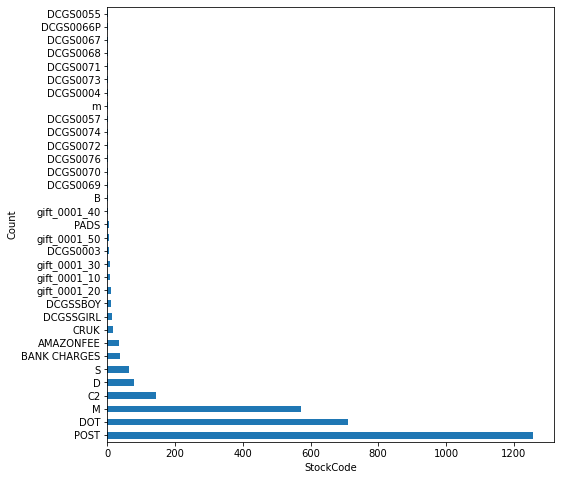

In [191]:
# NFX1) -> Descending
# 3B) Charting frequency of all non-numerical Stock-codes 

plt.figure(figsize=(8, 8))
df_stock_code_non_num['StockCode'].value_counts().plot(kind = 'barh')
plt.xlabel('StockCode')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

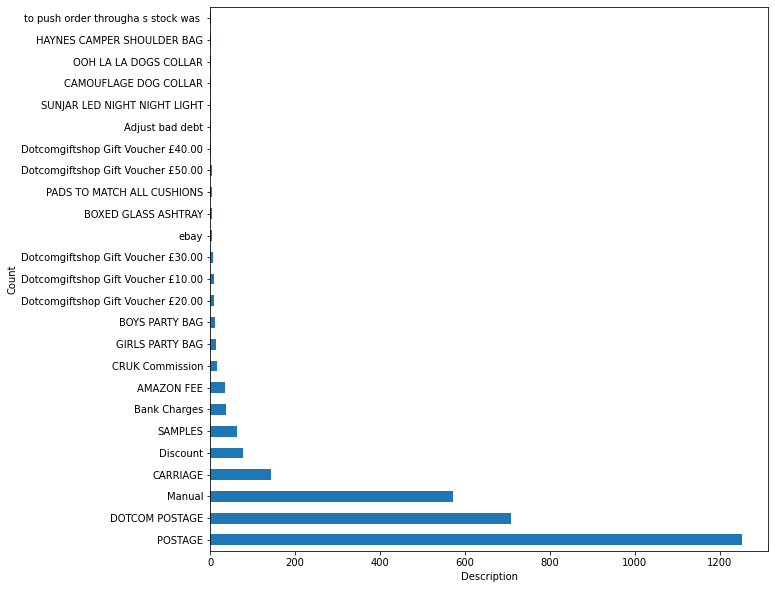

In [192]:
# NFX1
# 3C) Charting frequency of products(description) with  non-numerical Stock-codes 

plt.figure(figsize=(10,10))
df_stock_code_non_num['Description'].value_counts().plot(kind = 'barh')
plt.xlabel('Description')
plt.ylabel('Count')



# Notes


- Only 3 products have a relatively large count of non numerical stock codes
- The codes M,C2,D in the first chart refers to the manual, carriage and discount entries in the second chart.
 - Given that the total amount of non-numerical stock-code entries = ~ 2100 rows :
  - eg 2.100/540.000 -> ~ 1/250 of the dataset, we don't need (it is of trivial consequence) to remove them.


## Checking for null values

In [193]:
# Finding total number of nulls for each column
data.isnull().sum()

# Found 1454 nulls in Description and 135080 in CustomerID

Description      1454
Quantity            0
UnitPrice           0
Profit              0
MonthYear           0
Year                0
Month               0
Country             0
StockCode           0
InvoiceNo           0
InvoiceDate         0
CustomerID     135080
dtype: int64

### [Description] = null

In [194]:
# Creating filtered dataframe -> [Description] = null

null_prod_df = data[data['Description'].isnull()].head(30)

null_prod_df

,Description,Quantity,UnitPrice,Profit,MonthYear,Year,Month,Country,StockCode,InvoiceNo,InvoiceDate,CustomerID
622,NaN,56,0.0,0.0,12/2010,2010,12,United Kingdom,22139,536414,2010-12-01 11:52:00,NaN
1970,NaN,1,0.0,0.0,12/2010,2010,12,United Kingdom,21134,536545,2010-12-01 14:32:00,NaN
1971,NaN,1,0.0,0.0,12/2010,2010,12,United Kingdom,22145,536546,2010-12-01 14:33:00,NaN
1972,NaN,1,0.0,0.0,12/2010,2010,12,United Kingdom,37509,536547,2010-12-01 14:33:00,NaN
1987,NaN,1,0.0,0.0,12/2010,2010,12,United Kingdom,85226A,536549,2010-12-01 14:34:00,NaN
1988,NaN,1,0.0,0.0,12/2010,2010,12,United Kingdom,85044,536550,2010-12-01 14:34:00,NaN
2024,NaN,1,0.0,0.0,12/2010,2010,12,United Kingdom,20950,536552,2010-12-01 14:34:00,NaN
2025,NaN,3,0.0,0.0,12/2010,2010,12,United Kingdom,37461,536553,2010-12-01 14:35:00,NaN
2026,NaN,23,0.0,0.0,12/2010,2010,12,United Kingdom,84670,536554,2010-12-01 14:35:00,NaN
2406,NaN,-10,0.0,-0.0,12/2010,2010,12,United Kingdom,21777,536589,2010-12-01 16:50:00,NaN


In [195]:
data.dropna(subset=['Description'], inplace=True)
data.isnull().sum()

# Nulls in [Description] are 1454/541908 -> 1/500 -> Remove them as they wont affect the results significantly


Description         0
Quantity            0
UnitPrice           0
Profit              0
MonthYear           0
Year                0
Month               0
Country             0
StockCode           0
InvoiceNo           0
InvoiceDate         0
CustomerID     133626
dtype: int64

## [CustomerID] = null

In [196]:
# Creating filtered dataframe -> [CustomerID] = null

null_cust_df = data[data['CustomerID'].isnull()]
null_cust_df.head(30)

,Description,Quantity,UnitPrice,Profit,MonthYear,Year,Month,Country,StockCode,InvoiceNo,InvoiceDate,CustomerID
1443,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,2.51,12/2010,2010,12,United Kingdom,21773,536544,2010-12-01 14:32:00,NaN
1444,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,5.02,12/2010,2010,12,United Kingdom,21774,536544,2010-12-01 14:32:00,NaN
1445,POLKADOT RAIN HAT,4,0.85,3.40,12/2010,2010,12,United Kingdom,21786,536544,2010-12-01 14:32:00,NaN
1446,RAIN PONCHO RETROSPOT,2,1.66,3.32,12/2010,2010,12,United Kingdom,21787,536544,2010-12-01 14:32:00,NaN
1447,VINTAGE SNAP CARDS,9,1.66,14.94,12/2010,2010,12,United Kingdom,21790,536544,2010-12-01 14:32:00,NaN
1448,VINTAGE HEADS AND TAILS CARD GAME,2,2.51,5.02,12/2010,2010,12,United Kingdom,21791,536544,2010-12-01 14:32:00,NaN
1449,CHRISTMAS TREE DECORATION WITH BELL,10,0.43,4.30,12/2010,2010,12,United Kingdom,21801,536544,2010-12-01 14:32:00,NaN
1450,CHRISTMAS TREE HEART DECORATION,9,0.43,3.87,12/2010,2010,12,United Kingdom,21802,536544,2010-12-01 14:32:00,NaN
1451,CHRISTMAS TREE STAR DECORATION,11,0.43,4.73,12/2010,2010,12,United Kingdom,21803,536544,2010-12-01 14:32:00,NaN
1452,CHRISTMAS HANGING TREE WITH BELL,1,2.51,2.51,12/2010,2010,12,United Kingdom,21809,536544,2010-12-01 14:32:00,NaN


In [197]:
# Percentage of nulls[CustomerID]/total

round(len(null_cust_df) / len(data) * 100, 2)

# The percentage is around 1/4 of the dataset, should not hastily delete them.

24.72

## Handling [CustomerID] nulls

Text(0, 0.5, 'Count')

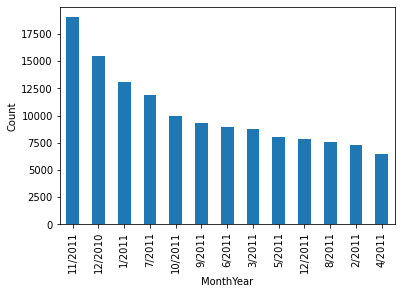

In [198]:
# Trying to find if there is a pattern depending on the month


# Plottting number on null entries for every month 
null_cust_df['MonthYear'].value_counts().plot(kind = 'bar')
plt.xlabel('MonthYear')
plt.ylabel('Count')



# The highest count of missing CustomerID nulls is on 11/2011 and 12/2010 -> Server maintenance?

In [199]:
# Trying to find if there is a pattern depending on the product
# We dont use a chart because there are too many products

null_cust_df['Description'].value_counts()

#Notes -> Null custIDs for dotcom-postage and some jumbo products
# Due to low number of rows, there is no need to remove them (They don't affect the general results of the dataset)

DOTCOM POSTAGE                       693
JUMBO BAG RED RETROSPOT              497
JUMBO STORAGE BAG SUKI               414
JUMBO SHOPPER VINTAGE RED PAISLEY    388
JUMBO BAG WOODLAND ANIMALS           372
                                    ... 
EAU DE NILE JEWELLED PHOTOFRAME        1
WHITE VINTAGE CRYSTAL BRACELET         1
RUBY GLASS NECKLACE 42"                1
PURPLE LAS VEGAS BRACELET ROUND        1
BLUE LEAVES AND BEADS PHONE CHARM      1
Name: Description, Length: 3554, dtype: int64

## Checking for dupes

In [200]:
# Showing all dupes

data[data.duplicated()]


,Description,Quantity,UnitPrice,Profit,MonthYear,Year,Month,Country,StockCode,InvoiceNo,InvoiceDate,CustomerID
517,UNION JACK FLAG LUGGAGE TAG,1,1.25,1.25,12/2010,2010,12,United Kingdom,21866,536409,2010-12-01 11:45:00,17908.0
527,HAND WARMER SCOTTY DOG DESIGN,1,2.10,2.10,12/2010,2010,12,United Kingdom,22866,536409,2010-12-01 11:45:00,17908.0
537,SET 2 TEA TOWELS I LOVE LONDON,1,2.95,2.95,12/2010,2010,12,United Kingdom,22900,536409,2010-12-01 11:45:00,17908.0
539,SCOTTIE DOG HOT WATER BOTTLE,1,4.95,4.95,12/2010,2010,12,United Kingdom,22111,536409,2010-12-01 11:45:00,17908.0
555,ROUND SNACK BOXES SET OF 4 SKULLS,1,2.95,2.95,12/2010,2010,12,United Kingdom,22327,536412,2010-12-01 11:49:00,17920.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541675,BLACK PIRATE TREASURE CHEST,1,0.39,0.39,12/2011,2011,12,United Kingdom,22068,581538,2011-12-09 11:34:00,14446.0
541689,BOX OF 6 MINI VINTAGE CRACKERS,1,2.49,2.49,12/2011,2011,12,United Kingdom,23318,581538,2011-12-09 11:34:00,14446.0
541692,REVOLVER WOODEN RULER,1,1.95,1.95,12/2011,2011,12,United Kingdom,22992,581538,2011-12-09 11:34:00,14446.0
541699,WICKER STAR,1,2.10,2.10,12/2011,2011,12,United Kingdom,22694,581538,2011-12-09 11:34:00,14446.0


In [201]:
# Counting all dupes

len(data[data.duplicated()])

5268

In [202]:
# Removing all dupes

data = data.drop_duplicates()
data[data.duplicated()].sum()

Description    0.0
Quantity       0.0
UnitPrice      0.0
Profit         0.0
MonthYear      0.0
Year           0.0
Month          0.0
Country        0.0
StockCode      0.0
InvoiceNo      0.0
CustomerID     0.0
dtype: float64

## Replacing illegal values 

In [203]:
# Replacing negative values in Quantity with 0\


data['Quantity'] = data['Quantity'].mask(data['Quantity'] < 0, 0)
data['Quantity'].describe()
# NFX2) -> Should I maintain negative values to reflect changes in quantity by returns?

count    535187.000000
mean         10.486936
std         155.969169
min           0.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [204]:
# Replacing null CustomerIDs with 0
data['CustomerID'].fillna(0, inplace = True)
data['CustomerID'].isnull().sum()

0

## Getting latitude and longitude for each country


In [205]:
# Creating a dictionary{'geo'} having Country, Latitude and Longitude as keys, based on the list of unique Countries in the store dataset (data).

geo = {}

keys = ['Country', 'lat', 'long']

key1 = 'Country'
key2 = 'lat'
key3 = 'long'

geo.setdefault(key1, [])
geo.setdefault(key2, [])
geo.setdefault(key3, [])

    
for c in data['Country'].unique() :
    location = geolocator.geocode(c)
    geo['Country'].append(location[0])
    geo['lat'].append(location.latitude)
    geo['long'].append(location.longitude)
    print(location, 'done!')
print('Finished!')

United Kingdom done!
France done!
Australia done!
Nederland done!
Deutschland done!
Norge done!
Éire / Ireland done!
Schweiz/Suisse/Svizzera/Svizra done!
España done!
Polska done!
Portugal done!
Italia done!
België / Belgique / Belgien done!
Lietuva done!
日本 done!
Ísland done!
Channel Islands, Ventura County, California, United States done!
Danmark done!
Κύπρος - Kıbrıs done!
Sverige done!
Österreich done!
ישראל done!
Suomi done!
البحرين done!
Ελλάς done!
香港島 Hong Kong Island, 香港 Hong Kong, 中国 done!
Singapore done!
لبنان done!
الإمارات العربية المتحدة done!
السعودية done!
Česko done!
Canada done!
(unspecified), ضلع آواران, بلوچستان, پاکستان done!
Brasil done!
United States done!
歐洲村社區, 崇德路五段, 大豐里, 潭子區, 臺中市, 42756, 臺灣 done!
Malta done!
South Africa done!
Finished!


In [206]:
# Converting to dataframe, in order to merge it with default store dataset (data).

geo_data = pd.DataFrame.from_dict(geo)
geo_data.head(20)

,Country,lat,long
0,United Kingdom,54.702354,-3.276575
1,France,46.603354,1.888334
2,Australia,-24.776109,134.755000
3,Nederland,52.228869,5.321450
4,Deutschland,51.083420,10.423447
5,Norge,60.500021,9.099972
6,Éire / Ireland,52.865196,-7.979460
7,Schweiz/Suisse/Svizzera/Svizra,46.798562,8.231974
8,España,39.326068,-4.837979
9,Polska,52.215933,19.134422


In [207]:
# Merging geo_data and data to get lat and long for each country

mapped_data = data.merge(geo_data, how  = 'left')
mapped_data.head(100)

,Description,Quantity,UnitPrice,Profit,MonthYear,Year,Month,Country,StockCode,InvoiceNo,InvoiceDate,CustomerID,lat,long
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,12/2010,2010,12,United Kingdom,85123A,536365,2010-12-01 08:26:00,17850.0,54.702354,-3.276575
1,WHITE METAL LANTERN,6,3.39,20.34,12/2010,2010,12,United Kingdom,71053,536365,2010-12-01 08:26:00,17850.0,54.702354,-3.276575
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,12/2010,2010,12,United Kingdom,84406B,536365,2010-12-01 08:26:00,17850.0,54.702354,-3.276575
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,12/2010,2010,12,United Kingdom,84029G,536365,2010-12-01 08:26:00,17850.0,54.702354,-3.276575
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,12/2010,2010,12,United Kingdom,84029E,536365,2010-12-01 08:26:00,17850.0,54.702354,-3.276575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LUNCH BOX WITH CUTLERY RETROSPOT,6,2.55,15.30,12/2010,2010,12,United Kingdom,22352,536378,2010-12-01 09:37:00,14688.0,54.702354,-3.276575
96,PACK OF 72 RETROSPOT CAKE CASES,120,0.42,50.40,12/2010,2010,12,United Kingdom,21212,536378,2010-12-01 09:37:00,14688.0,54.702354,-3.276575
97,PACK OF 60 DINOSAUR CAKE CASES,24,0.55,13.20,12/2010,2010,12,United Kingdom,21975,536378,2010-12-01 09:37:00,14688.0,54.702354,-3.276575
98,PACK OF 60 PINK PAISLEY CAKE CASES,24,0.55,13.20,12/2010,2010,12,United Kingdom,21977,536378,2010-12-01 09:37:00,14688.0,54.702354,-3.276575


In [211]:

export = mapped_data.to_csv(r'C:\Users\Θοδωρής\clean_geo_data.csv')